In [69]:
import urllib.request
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import math

%matplotlib inline

data_download=False
### set this to True if running for the first time
if data_download:
    urllib.request.urlretrieve("http://clouds.eos.ubc.ca/~phil/docs/atsc500/tropical_subset.nc", 
                           "tropical_subset.nc")

Define varriables

In [116]:
with Dataset('tropical_subset.nc','r') as nc_in:
    print(list(nc_in.variables.keys()))
    #
    # remove the time dimension since we only have one timestep
    #   
    
    Rd=287  #dry air gas constant  J/kg/K
    cp=1004.  #dry air heat capacity at constant pressure (J/kg/K)
    p0=1.e5 
    g=9.8
    k=0.4
    Z=nc_in.variables['z'][...]
    X=nc_in.variables['x'][...]
    Y=nc_in.variables['y'][...]
    pres=nc_in.variables['p'][...]  
    pres=pres*100.  #convert to Pa
    T=nc_in.variables['TABS'][0,...]
    W=nc_in.variables['W'][0,...]  #m/s
    U=nc_in.variables['U'][0,...]  #m/s
    V=nc_in.variables['V'][0,...]  #m/s  
    qv=nc_in.variables['QV'][0,...]  #g/kg
    qv = qv/1000
    qn=nc_in.variables['QN'][0,...]  #g/kg
    qn = qn/1000
    
#
#       Mean Values
#        
    T_bar=T.mean(axis=2).mean(axis=1)
    W_bar=W.mean(axis=2).mean(axis=1)
    V_bar=V.mean(axis=2).mean(axis=1)
    U_bar=U.mean(axis=2).mean(axis=1)
    P_bar=pres.mean(axis=2).mean(axis=1)
#   
#   Theta & Theta_v
#    
    Theta = T*(p0/pres[:,np.newaxis,np.newaxis])**(Rd/cp)
    Theta_v = Theta*(1+0.61*qv-qn)
#
#   Primes
#
    w_Bar = W.mean(axis = 2).mean(axis = 1)
    w_prime = W - w_Bar[:,np.newaxis,np.newaxis]
    u_Bar = U.mean(axis = 2).mean(axis = 1)
    u_prime = U - u_Bar[:,np.newaxis,np.newaxis]
    v_Bar = V.mean(axis = 2).mean(axis = 1)
    v_prime = V - v_Bar[:,np.newaxis,np.newaxis]
    Theta_v_Bar = Theta_v.mean(axis = 2).mean(axis = 1)
    Theta_v_prime = Theta_v - Theta_v_Bar[:,np.newaxis,np.newaxis]
    P_prime=pres-P_bar

['x', 'y', 'z', 'time', 'p', 'U', 'V', 'W', 'PP', 'TABS', 'QV', 'QN', 'QP']


IndexError: tuple index out of range

### Calculate zi ~ 425 m

425.0


 (0, 1000),

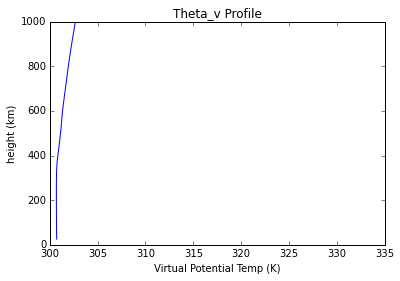

In [71]:
x=0
y=0
while x == 0:
    if Theta_v_Bar[y]+0.1 < Theta_v_Bar[y+1]:
        x = y+1     
    y = y+1
print (Z[x])
zi_lev = x
pl = plt.figure(1)
ax1 = pl.add_subplot(1,1,1)
ax1.plot(Theta_v_Bar,Z)
ax1.set(xlabel='Virtual Potential Temp (K)',ylabel='height (km)',title = 'Theta_v Profile',ylim=(0,1000))

# Calculate, tke, w*, u*,& L varriables
    ### For L I had to average w_'*theta_v' and ustar over the depth of the boundary layer to avoid errors fro divding by a zero value since the w' at z=0 is zero

In [105]:
## w*
w_star = g*Z[zi_lev]/Theta_v_Bar[:,np.newaxis,np.newaxis]*(w_prime*Theta_v_prime)
temp = w_star
temp[temp < 0] = -1
temp[temp > 0] = 1
w_star = (abs(w_star)**(1/3)*temp).mean(axis = 2).mean(axis = 1)
wst = w_star[0:x].mean()
## u*
uw_bar = (u_prime*w_prime).mean(axis = 2).mean(axis = 1)
vw_bar = (v_prime*w_prime).mean(axis = 2).mean(axis = 1)
u_star = (uw_bar**2+vw_bar**2)**(.25)
ust = u_star[0:x].mean()
## TKE
w_prime_bar = w_prime.mean(axis = 2).mean(axis = 1)
u_prime_bar = u_prime.mean(axis = 2).mean(axis = 1)
v_prime_bar = v_prime.mean(axis = 2).mean(axis = 1)
TKE = 0.5*(w_prime_bar**2+u_prime_bar**2+v_prime_bar**2)
### L
wTheta_v_Bar = (Theta_v_prime*w_prime).mean(axis = 2).mean(axis = 1)
w_theta_v_Bar = wTheta_v_Bar[0:x].mean()
L = w_theta_v_Bar*ust3**3/(k*g*w_theta_v_Bar)

0.000466908080849 0.0062503011794


In [115]:
fig59a = w_prime_bar*TKE/(wst**3)
fig59b = w_prime_bar*TKE/(ust**3)
fig510a = (w_prime*(u_prime**2+v_prime**2)).mean(axis = 2).mean(axis = 1)/(2*wst**3)
fig510b = (w_prime**3).mean(axis=2).mean(axis=1)/(2*wst**3)
wpm = w_prime**3
wpm = wpm.mean()
fig510c = ((w_prime*(u_prime**2+v_prime**2)).mean(axis = 2).mean(axis = 1))/(wpm)
